In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from tabulate import tabulate

import warnings

In [43]:
seed = 240101025
np.random.seed(seed)
random.seed(seed)

In [44]:
warnings.filterwarnings("ignore")

In [45]:
def generate_dataset(n_samples, mu, sigma):
    x_train = np.random.rand(n_samples)
    x_test = np.random.rand(n_samples)

    noise_train = np.random.normal(mu, sigma, n_samples)
    noise_test = np.random.normal(mu, sigma, n_samples)

    y_train = np.sin(1 + x_train**2) + noise_train
    y_test = np.sin(1 + x_test**2) + noise_test
    
    train_set = np.column_stack((x_train, y_train))
    test_set = np.column_stack((x_test, y_test))

    return train_set, test_set

In [46]:
def train_polynomial_models(train_set, test_set, degrees):
    x_train = train_set[:, 0].reshape(-1, 1)
    y_train = train_set[:, 1]
    x_test = test_set[:, 0].reshape(-1, 1)
    y_test = test_set[:, 1]

    models = []
    E_in = []
    E_out = []

    for degree in degrees:
        model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        model.fit(x_train, y_train)
        models.append(model)

        y_train_pred = model.predict(x_train)
        y_test_pred = model.predict(x_test)

        e_in = mean_squared_error(y_train, y_train_pred)
        e_out = mean_squared_error(y_test, y_test_pred)

        E_in.append(e_in)
        E_out.append(e_out)

    return models, E_in, E_out

1. Tạo 03 bộ dữ liệu D1, D2, D3. Mỗi bộ dữ liệu có 1 tập train gồm 10 điểm dữ liệu và 1 tập test gồm 10 điểm dữ liệu. Các điểm dữ liệu (x,y) có giá trị input x được phát sinh ngẫu nhiên trong khoảng [0,1], và giá trị target y = f(x)=sin(1+x^2)+ε với ε tuân theo phân phối chuẩn N(0,σ=0.03) như trong trang 58 của slides. Lưu ý σ=0.03 là độ lệch chuẩn (standard deviation).

In [47]:
# Generate multiple datasets and train models
num_datasets = 3  # Number of datasets to generate
degrees = range(1, 10)
all_models = []
all_E_in = []
all_E_out = []
all_train_sets = []  # Store training sets for plotting
all_test_sets = []

for _ in range(num_datasets):
    train_set, test_set = generate_dataset(10, 0, 0.03)
    models, E_in, E_out = train_polynomial_models(train_set, test_set, degrees)
    all_models.append(models)
    all_E_in.append(E_in)
    all_E_out.append(E_out)
    all_train_sets.append(train_set)
    all_test_sets.append(test_set)

2. Với mỗi bộ dữ liệu, ta sử dụng tập train để huấn luyện 9 mô hình polynomial regression có bậc (degree) từ 1-9 như trong trang 65 của slides. Sau đó, hãy tính E_in (trên tập train) và E_out (trên tập test) cho từng mô hình đã huấn luyện được, và tạo bảng kết quả như trong trang 66 của slides.

In [48]:
for dataset_index in range(num_datasets):
    table_data = []
    for degree, e_in, e_out in zip(
        degrees, all_E_in[dataset_index], all_E_out[dataset_index]
    ):
        table_data.append([degree, f"{e_in:.10f}", f"{e_out:.10f}"])

    headers = ["Degree", f"E_in_D{dataset_index+1}", f"E_out_D{dataset_index+1}"]
    table = tabulate(
        table_data, headers, tablefmt="grid", colalign=("center", "center", "center")
    )
    print(f"Dataset D{dataset_index + 1}'")
    print(table)
    print("\n")

Dataset D1'
+----------+-------------+------------+
|  Degree  |   E_in_D1   |  E_out_D1  |
+==========+=============+============+
|    1     | 0.000781974 | 0.0034366  |
+----------+-------------+------------+
|    2     | 0.000291909 | 0.00200565 |
+----------+-------------+------------+
|    3     | 0.000290111 | 0.00182392 |
+----------+-------------+------------+
|    4     | 0.000288274 | 0.00169599 |
+----------+-------------+------------+
|    5     |  0.0002077  | 0.0258563  |
+----------+-------------+------------+
|    6     | 0.00014041  |  0.177706  |
+----------+-------------+------------+
|    7     | 0.000137707 |  0.256069  |
+----------+-------------+------------+
|    8     | 2.48048e-05 |  1699.15   |
+----------+-------------+------------+
|    9     |      0      |   540895   |
+----------+-------------+------------+


Dataset D2'
+----------+-------------+------------+
|  Degree  |   E_in_D2   |  E_out_D2  |
+==========+=============+============+
|    1     | 0

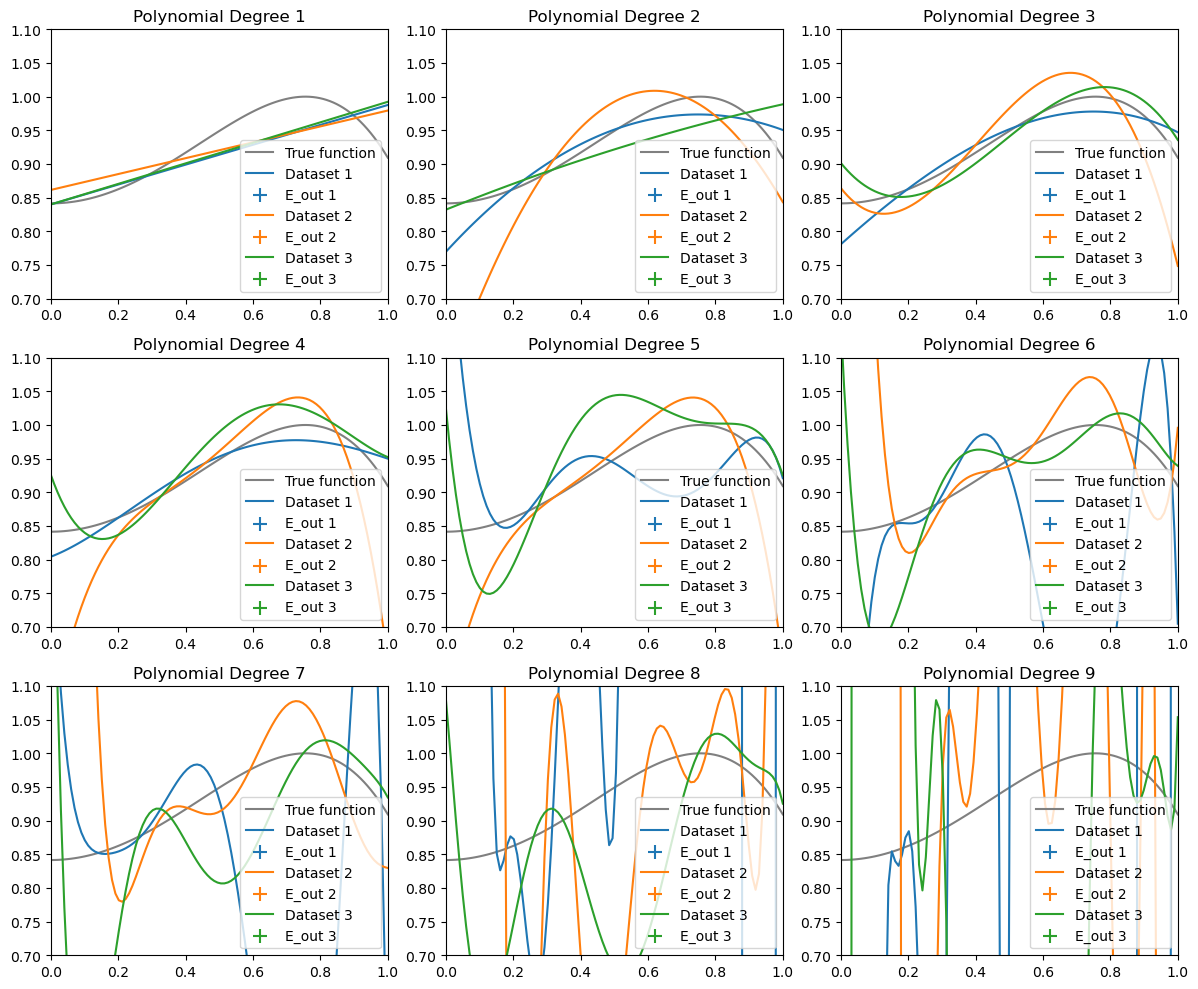

In [50]:
fig, axes = plt.subplots(3, 3, figsize=(12, 10)) 
axes = axes.flatten()

x_plot = np.linspace(0, 1, 100).reshape(-1, 1)
y_true = np.sin(1 + x_plot**2)

for i, degree in enumerate(degrees):  # Lặp qua từng bậc từ 1 đến 9
    ax = axes[i]
    
    # Vẽ đường hàm thực sự (dashed line màu xám)
    ax.plot(x_plot, y_true, color="gray", linestyle="solid", label="True function")
    
    # Vẽ 3 mô hình hồi quy đa thức (từ 3 bộ dữ liệu)
    for j in range(num_datasets):
        model = all_models[j][i]  # Lấy mô hình tương ứng với dataset j và bậc i
        y_pred = model.predict(x_plot)
        ax.plot(x_plot, y_pred, label=f"Dataset {j+1}", linestyle="solid")

        # Vẽ điểm E_out dưới dạng dấu "+", mỗi bộ dữ liệu 1 màu khác nhau
        ax.scatter(degree, all_E_out[j][i], marker="+", s=100, label=f"E_out {j+1}")

    ax.set_title(f"Polynomial Degree {degree}")
    ax.set_xlim(0, 1)
    ax.set_ylim(0.7, 1.1)
    ax.legend()

plt.tight_layout()
plt.show()
